In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
from datetime import datetime
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import utils
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Activation, Input, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
import scipy as sc
import time

In [15]:
train = pd.read_csv('M:/Users/angui/Desktop/proyectos_personales/dataScienceLondon/train.csv', header = None)
trainLabels = pd.read_csv('M:/Users/angui/Desktop/proyectos_personales/dataScienceLondon/trainLabels.csv', header = None)
test = pd.read_csv('M:/Users/angui/Desktop/proyectos_personales/dataScienceLondon/test.csv', header = None)

In [20]:
train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217


In [19]:
trainLabels

,0
0,1
1,0
2,0
3,1
4,0
...,...
995,0
996,1
997,1
998,0


In [21]:
test

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.171644,-0.806952,-2.045671,0.021156,2.258491,0.429469,0.857187,0.972600,1.707492,1.676370,...,-1.366312,0.276543,-0.732764,0.243930,-1.151233,-0.274298,0.573013,1.109814,-1.905965,1.457601
8996,1.168564,-0.911253,1.685492,0.867183,3.606170,-0.673875,-1.889365,0.411385,-0.206817,-0.705771,...,0.557757,0.379841,-1.474198,-0.322943,1.964519,0.122384,0.678023,2.024129,0.386542,1.104493
8997,0.052274,-1.736558,-0.263699,-0.219329,8.918393,-1.258320,-3.361146,0.893366,-0.631669,1.887286,...,2.117847,-1.050824,0.182872,0.242725,0.670161,0.112752,-3.006949,1.179606,1.156340,-1.218561
8998,1.443659,0.651892,0.550724,-1.146664,2.621641,-0.867143,0.312742,1.078004,-1.212524,-0.028143,...,0.631480,1.186236,-1.098508,1.159658,-1.957241,0.482533,3.777669,-0.424954,1.333374,2.325271


In [22]:
train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [25]:
continuastrain = train.columns
continuastest = test.columns
scaler = StandardScaler()

for var in continuas:
    train[var] = train[var].astype('float64')
    train[var] = scaler.fit_transform(train[var].values.reshape(-1, 1))
    
    test[var] = test[var].astype('float64')
    test[var] = scaler.fit_transform(test[var].values.reshape(-1, 1))

In [35]:
#X_train = datos.drop(columns = ['Survived'])
X_train = train
y_train = trainLabels

In [36]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.271694,-1.183412,1.555777,-1.210073,0.925265,0.217014,0.900554,0.731639,-0.077955,0.658265,...,-0.871410,-0.645377,-0.576450,0.298091,1.903665,0.679793,1.229941,-2.730228,-0.885572,-0.248677
1,-1.190511,0.351139,0.995287,-1.322617,0.243958,-0.146686,-0.436490,1.190929,-0.791829,-0.089025,...,-0.841033,-0.010905,1.152986,0.469876,-0.016107,0.386427,0.106214,1.209835,1.125967,-1.187240
2,1.157622,-0.383785,0.093134,-2.300095,0.565748,0.096352,-0.138780,-1.874007,-1.210629,-1.220826,...,-0.628156,0.726468,-1.258713,0.849944,-1.069674,-1.605605,0.496264,0.651454,-0.019700,1.163161
3,1.535729,-0.547152,-0.860645,-0.620088,0.448222,0.886648,-0.311336,2.033736,1.011781,-1.075128,...,0.981376,1.251553,-1.312129,-1.031019,1.243569,1.520225,0.987951,0.209498,0.748291,0.623135
4,-0.633738,-0.610045,1.161480,-0.031054,0.528553,-0.005750,0.446783,-1.905931,-1.786693,0.800827,...,0.477930,-1.824829,0.473942,-0.189268,-2.009724,-1.543292,0.567400,0.866404,-0.495767,-0.098374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.333432,0.838103,-0.948435,0.794897,0.173080,1.342151,0.683395,0.550975,-0.154028,0.073576,...,-0.624111,-0.406388,0.575342,-0.672239,-1.059527,-0.461885,-0.087262,1.015150,-0.880823,-0.442470
996,-1.864969,0.267035,0.494583,-2.135881,1.434322,-0.133624,-2.360628,0.299630,-1.616014,-1.095101,...,0.327437,0.216911,-0.140121,-0.059566,-1.156667,0.545472,-1.428348,0.029923,1.831741,1.860246
997,0.880305,-1.682939,-1.045296,0.226623,2.725738,0.170964,-1.297533,1.010266,-0.404490,0.637416,...,1.152407,-1.095800,-0.987966,1.787251,-1.748213,-1.142341,-1.197842,0.054821,0.884803,0.099899
998,2.395551,-0.699933,-0.897527,1.409465,-2.539946,-0.860389,1.033702,0.147869,0.558682,-0.862149,...,2.207089,-0.062384,0.587974,-0.885037,1.456610,-0.678805,-1.792225,0.223539,-0.701842,-1.972039


In [44]:
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'sigmoid'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.05), metrics = ['binary_accuracy'])
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size = 32, shuffle = True)


Epoch 1/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7083 - binary_accuracy: 0.4737 - val_loss: 0.6992 - val_binary_accuracy: 0.4850
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - binary_accuracy: 0.5225 - val_loss: 0.6891 - val_binary_accuracy: 0.5500
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6789 - binary_accuracy: 0.5875 - val_loss: 0.6810 - val_binary_accuracy: 0.5650
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6646 - binary_accuracy: 0.6100 - val_loss: 0.6766 - val_binary_accuracy: 0.5650
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6519 - binary_accuracy: 0.6712 - val_loss: 0.6631 - val_binary_accuracy: 0.6100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6352 - binary_accuracy: 0.6950 - val_loss: 0.6494 - val_binary_accuracy: 0.6450
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - los

25/25 [==============================] - 0s 1ms/step - loss: 0.3458 - binary_accuracy: 0.8500 - val_loss: 0.4628 - val_binary_accuracy: 0.8150
Epoch 54/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3439 - binary_accuracy: 0.8438 - val_loss: 0.4672 - val_binary_accuracy: 0.8100
Epoch 55/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3424 - binary_accuracy: 0.8425 - val_loss: 0.4604 - val_binary_accuracy: 0.8100
Epoch 56/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3423 - binary_accuracy: 0.8462 - val_loss: 0.4603 - val_binary_accuracy: 0.8100
Epoch 57/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3413 - binary_accuracy: 0.8525 - val_loss: 0.4626 - val_binary_accuracy: 0.8150
Epoch 58/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3395 - binary_accuracy: 0.8475 - val_loss: 0.4624 - val_binary_accuracy: 0.8150
Epoch 59/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3

25/25 [==============================] - 0s 1ms/step - loss: 0.2778 - binary_accuracy: 0.8788 - val_loss: 0.4514 - val_binary_accuracy: 0.8100
Epoch 106/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2766 - binary_accuracy: 0.8788 - val_loss: 0.4598 - val_binary_accuracy: 0.8050
Epoch 107/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2734 - binary_accuracy: 0.8825 - val_loss: 0.4508 - val_binary_accuracy: 0.8150
Epoch 108/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2740 - binary_accuracy: 0.8800 - val_loss: 0.4541 - val_binary_accuracy: 0.8100
Epoch 109/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2710 - binary_accuracy: 0.8850 - val_loss: 0.4520 - val_binary_accuracy: 0.8050
Epoch 110/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2704 - binary_accuracy: 0.8838 - val_loss: 0.4554 - val_binary_accuracy: 0.8050
Epoch 111/200
25/25 [==============================] - 0s 1ms/step - los

Epoch 157/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2005 - binary_accuracy: 0.9212 - val_loss: 0.4713 - val_binary_accuracy: 0.8100
Epoch 158/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2014 - binary_accuracy: 0.9225 - val_loss: 0.4700 - val_binary_accuracy: 0.8100
Epoch 159/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1985 - binary_accuracy: 0.9225 - val_loss: 0.4700 - val_binary_accuracy: 0.8100
Epoch 160/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1966 - binary_accuracy: 0.9212 - val_loss: 0.4718 - val_binary_accuracy: 0.8100
Epoch 161/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1955 - binary_accuracy: 0.9200 - val_loss: 0.4733 - val_binary_accuracy: 0.8150
Epoch 162/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1941 - binary_accuracy: 0.9312 - val_loss: 0.4742 - val_binary_accuracy: 0.8100
Epoch 163/200
25/25 [==============================] - 0s 

In [45]:
dfaux = pd.DataFrame(columns = ['Epocas','Capa1 - Funcion de activacion', 'Capa2 - Funcion de activacion', 'Capa3 - Funcion de activacion', 'learning_rate', 'batch_size'])

In [48]:
def modelo(epocas, act_capa1, act_capa2, act_capa3, learning_rate, batch_size):
    dfaux = pd.DataFrame(columns = ['Epocas','Capa1 - Funcion de activacion', 'Capa2 - Funcion de activacion', 'Capa3 - Funcion de activacion', 'learning_rate', 'batch_size', 'precision', 'perdida'])
    i = 0
    for epoca in epocas:
        for act1 in act_capa1:
            for act2 in act_capa2:
                for act3 in act_capa3:
                    for lrate in learning_rate:
                        for bz in batch_size:
                            model = Sequential()
                            model.add(Dense(10, input_dim = X_train.shape[1], activation = act1))
                            model.add(Dense(15,activation = act2))
                            model.add(Dense(1, activation = act3))
                            model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = lrate), metrics = ['binary_accuracy'])
                            history = model.fit(X_train, y_train, epochs=epoca, batch_size=bz, validation_split=0.2, verbose=0)
                            precision = max(history.history.get('binary_accuracy'))
                            perdida = max(history.history.get('loss'))
                            dfaux.loc[i] = (epoca, act1, act2, act3, lrate, bz, precision, perdida)
                            i = i+1
        
    return dfaux

In [49]:
epocas = [50, 100]
act_capa1 = ['relu', 'sigmoid']
act_capa2 = ['softmax', 'relu', 'sigmoid']
act_capa3 = ['sigmoid', 'relu']
learning_rate = [0.005]
batch_size = [32, 64]
DataFrame = modelo(epocas, act_capa1, act_capa2, act_capa3, learning_rate, batch_size)

In [51]:
DataFrame.sort_values(by = ['precision', 'perdida'], ascending = [False, True]).head()

,Epocas,Capa1 - Funcion de activacion,Capa2 - Funcion de activacion,Capa3 - Funcion de activacion,learning_rate,batch_size,precision,perdida
6,50,relu,relu,relu,0.005,32,0.87125,2.134625
28,100,relu,relu,sigmoid,0.005,32,0.86000,0.838125
30,100,relu,relu,relu,0.005,32,0.85875,4.038535
34,100,relu,sigmoid,relu,0.005,32,0.84250,2.767728
31,100,relu,relu,relu,0.005,64,0.82625,4.716605


In [53]:
max(history.history.get('loss')))
print(max(history.history.get('binary_accuracy')))

0.6781937479972839
0.800561785697937


In [62]:
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.005), metrics = ['binary_accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

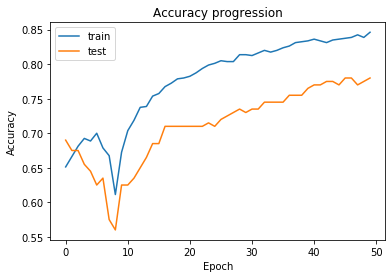

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history["binary_accuracy"])
plt.plot(history.history["val_binary_accuracy"])
plt.title("Accuracy progression")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="best")
plt.show()

In [64]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.770888,-0.244376,-0.546555,0.249301,0.107639,-0.036476,-0.857477,1.630853,-0.681858,-0.885102,...,-0.241953,-0.230902,-0.544276,-0.488085,0.126029,-0.664505,0.030457,0.012705,0.295043,1.132725
1,-0.382299,0.527408,0.083051,0.756514,-0.076691,2.552384,1.532910,0.767078,-0.779461,-1.231827,...,-0.947334,0.565024,-0.782613,-1.603208,0.327914,-2.898076,0.087941,-1.468756,0.472766,-0.753722
2,-0.099245,0.148788,0.383718,-1.197972,0.096624,-0.264744,-0.887411,0.503872,1.607185,0.239326,...,-0.748431,-0.012384,0.882850,0.460390,-1.446728,0.810084,-0.961888,1.267785,-0.376854,0.613418
3,-0.690914,0.491432,1.881424,0.208917,-1.158740,-0.109687,1.738842,-0.094442,-1.538588,-1.074213,...,0.984182,2.371374,0.156955,0.265300,1.340171,1.247455,-0.920811,-0.123204,-0.013894,-1.732608
4,0.335876,0.709564,-0.477003,-1.777018,-0.859206,1.069894,2.128010,-1.486141,-0.775667,0.212831,...,0.278521,-2.046240,-0.770221,0.351294,0.457445,-0.207627,0.388619,-0.520072,1.762115,-0.248894


In [85]:
output = (model.predict(test) > 0.5).astype("int32")
l2 = []
for i in range(len(output)):
    l2.append(i+1)

In [90]:
df3 = pd.DataFrame()
df3['Id'] = l2
df3['Solution'] = output

In [91]:
df3

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
8995,8996,1
8996,8997,1
8997,8998,1
8998,8999,0


In [94]:
df3.to_csv(r'M:/Users/angui/Desktop/proyectos_personales/datascienceLondon/predictions.csv', index = False)